# Project 3 - App to Forecast IPO market

A IPO is called an Initial Public Offereing, it is where companies will offer the public to buy in on shares of the company. Buying into an IPO can be a great opportunity for investment depending on the market and its influences. This project aims to use machine learning techniques to aid in the decision of which IPOs are worth a closer look and which ones are not. 

The breakdown of this project are:
- Learning about the IPO market
- Data cleaning and feature engineering
- Logistic Regression to perform Binary classification
- Model Evaluation
- Feature importance


## 1 The IPO Makert:

Before getting starting or diving right into coding, it is important to learn or establish some ideas/knwoledge about the tpoic of interest, where in this case, it is the IPO market. 

#### Lets begin with What is an IPO?

Well, it is when a private company turns into a public company. It is a way to raise capital and provides an opportunity to invest in the company. Companies can do this by enlisting the aid of one or more investment institutions/banks to underwrite the company's offering. To clarify, this means that the banks will make a guarantee to puchase all the shares offered at the IPO price on the day and head out for a roadshow. The purpose of the roadshow is to gain interest from institutional clients where they would subscribe for the shares, this means that they indicate interest in buying the shares on the day of openning. The underwriter then set the offer or IPO price which is dependent on the level of interest.

Another interesting feature is that there seem to be a systematic underpricing of IPOs where billions of dollars are left on the table. Money left on the table can be described as the difference betwen the offer price and the first day's closing price. Additionally, to get a better deal than the opening price requires a broker on your behalf, otherwise you'll pay the higher (opening) price. 

The model here would be built under these assumptions.

#### Data:

The data is recent and sourced from https://www.iposcoop.com/scoop-track-record-from-2000-to-present/. It is downloaded and saved into a folder. Note that it is not possible to read the data with 'Pandas' package, so the 'xlrd' package is used instead.

## 2 Import the required libraries:

In [1]:
import numpy as np
import pandas as pd
import xlrd
import os
import datetime

import matplotlib.pyplot as plt 
%matplotlib inline

## 3 Load in the excel workbook:

In [2]:
ipo_data = 'SCOOP-Rating-Performance.xls'

ipo_folder = os.path.dirname(os.path.realpath(ipo_data))
ipo_file = os.path.realpath(ipo_data)
file_path = ipo_folder + '/IPO Data/'

print(file_path)


ipo_wb = xlrd.open_workbook(file_path + ipo_data)

C:\Users\yewsh\OneDrive\Packt - Python Machine Learning Blue Prints\Project 3 - App to Forecast IPO market/IPO Data/


In [3]:
# Select the worksheet to work with:
ipo_worksheet = ipo_wb.sheet_by_index(0)

In [4]:
ipo_worksheet.nrows

3575

#### After examining and comparing the no. of rows above to the Excel workbook, everything seems to be consistent.

### 3.1 Incorporating the Data: row by row

Note that the data of interest starts from the row 36 and onwards. It will also include column names.

A loop is created to save each row in the spreadsheet, it firstly checks if the first value from the workbook is a float and if yes, it will add all the cell's values to the ipo_list. This will take into account that the Date column is a float and is of interest for this project. 

In [5]:
ipo_list = []

for i in range(36, ipo_worksheet.nrows):
    if isinstance(ipo_worksheet.row(i)[0].value, float):
        ipo_list.append([x.value for x in ipo_worksheet.row(i)])
    else:
        print(i, ipo_worksheet.row(i))

36 [text:'Date', text:'Issuer', text:'Symbol', text:' Managers', text:'Price', text:'Price', text:'Close', text:'% Px Chng ', text:'Opening', text:'Close', text:'Ratings', text:'Performed']
37 [empty:'', number:2020.0, empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
44 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
45 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
46 [text:'Trade', empty:'', empty:'', text:'Lead/Joint-Lead', text:'Offer', text:'Opening', text:'1st Day', text:'1st Day', text:'$ Change', text:'$ Change', text:'Star', empty:'']
47 [text:'Date', text:'Issuer', text:'Symbol', text:' Managers', text:'Price', text:'Price', text:'Close', text:'% Px Chng ', text:'Opening', text:'Close', text:'Ratings', text:'Performed']
48 [empty:'', number:2019.0, empty:'', empty:'', empty:'', emp

In [6]:
len(ipo_list)

3433

### 3.2 Save the extracted ipo_list as a DataFrame:

In [7]:
df_ipo = pd.DataFrame(ipo_list)
df_ipo.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,43847.0,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.0892857,0.75,-1.25,2,
1,43847.0,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.0572727,0.03,0.63,1,
2,43847.0,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0,0.00,0.00,1,
3,43847.0,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.0392308,0.85,0.51,1,
4,43854.0,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045,0.52,0.45,1,


From the above, inspection of the dataframe, the residing information/data looks good.

#### Next, add the columns to the dataframe:

In [8]:
df_ipo.columns = ['Date', 'Company', 'Ticker', 'Managers', 
                  'Offer Price', 'Opening Price', '1st Day Close', 
                  '1st Dy % Chg', '$ Chg Open', '$ Chg Close', 'Star Rating', 'Performed']

In [9]:
df_ipo.head()

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Dy % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed
0,43847.0,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.0892857,0.75,-1.25,2,
1,43847.0,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.0572727,0.03,0.63,1,
2,43847.0,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0,0.00,0.00,1,
3,43847.0,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.0392308,0.85,0.51,1,
4,43854.0,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045,0.52,0.45,1,


#### Convert the Date column from float to datetime:

In [10]:
def to_date(x):
    date = xlrd.xldate.xldate_as_datetime(x, ipo_wb.datemode)
    return date

In [11]:
df_ipo['Date'] = df_ipo['Date'].apply(to_date)
df_ipo.head()

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Dy % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.0892857,0.75,-1.25,2,
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.0572727,0.03,0.63,1,
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0,0.00,0.00,1,
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.0392308,0.85,0.51,1,
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045,0.52,0.45,1,


#### Next, add additional dates: split up the date format.

In [12]:
df_ipo['Year'], df_ipo['Month'], df_ipo['Day'], df_ipo['Day of Week'] = df_ipo['Date'].dt.year, df_ipo['Date'].dt.month, df_ipo['Date'].dt.day, df_ipo['Date'].dt.weekday

In [13]:
df_ipo.head()

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Dy % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.0892857,0.75,-1.25,2,,2020,1,17,4
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.0572727,0.03,0.63,1,,2020,1,17,4
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0,0.00,0.00,1,,2020,1,17,4
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.0392308,0.85,0.51,1,,2020,1,17,4
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045,0.52,0.45,1,,2020,1,24,4


#### Comapre the dataFrame to the original Excel worksheet:

In [14]:
by_year_count = df_ipo.groupby('Year')[['Ticker']].count()
by_year_count

,Ticker
Year,
2000,237
2001,94
2002,82
2003,80
2004,233
2005,226
2006,237
2007,256
2008,47


After comparison, the values shown are consistent.

### 3.3 Check for Penny Stock (very low-priced stocks): and Drop them.

In [15]:
df_ipo.drop(df_ipo[df_ipo['Offer Price'] < 5].index, inplace = True)
df_ipo.reset_index(drop = True, inplace = True)

df_ipo.dtypes

Date             datetime64[ns]
Company                  object
Ticker                   object
Managers                 object
Offer Price             float64
Opening Price           float64
1st Day Close           float64
1st Dy % Chg             object
$ Chg Open              float64
$ Chg Close             float64
Star Rating              object
Performed                object
Year                      int64
Month                     int64
Day                       int64
Day of Week               int64
dtype: object

From the above inspection, the '1st Dy % Chg' column is an object, but it is required to be in Float format.

In [16]:
df_ipo['1st Dy % Chg'] = df_ipo['1st Dy % Chg'].astype(float)
df_ipo.dtypes

Date             datetime64[ns]
Company                  object
Ticker                   object
Managers                 object
Offer Price             float64
Opening Price           float64
1st Day Close           float64
1st Dy % Chg            float64
$ Chg Open              float64
$ Chg Close             float64
Star Rating              object
Performed                object
Year                      int64
Month                     int64
Day                       int64
Day of Week               int64
dtype: object

## 4 Exploratory Data Analysis:

EDA on the IPO data since the year 2000.

#### Plot of the IPOs (100s) in the most recent years:

Text(0.5, 1.02, 'IPO Count by Year')

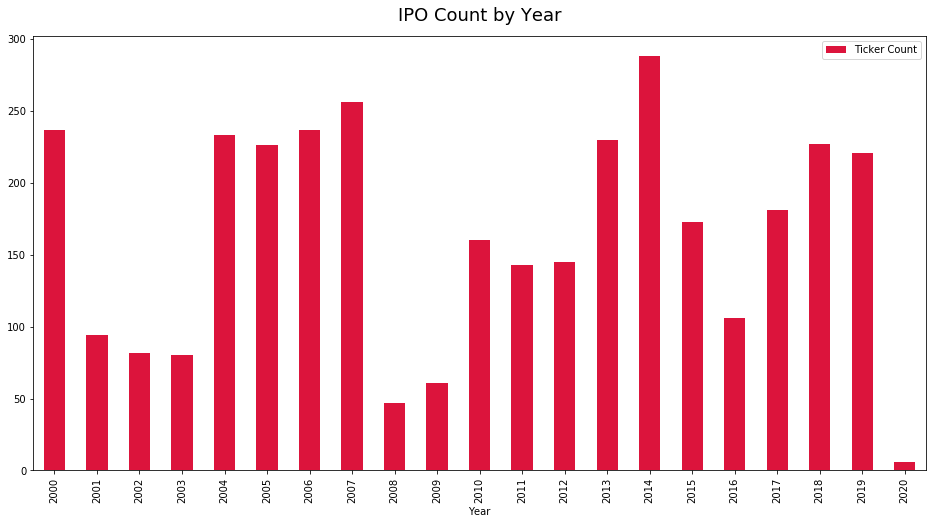

In [17]:
# Initial plot:

fig, ax = plt.subplots(figsize = (16, 8))
by_year_count.plot(kind = 'bar', ax = ax, color = 'crimson')
ax.legend(['Ticker Count'])
ax.set_title('IPO Count by Year', fontdict = {'size': 18}, y = 1.02)

#### Summary of the performance of the Stocks:

In [18]:
summary_byYear = df_ipo.groupby('Year')['1st Dy % Chg'].describe()
summary_byYear

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000,237.0,0.355621,0.557065,-0.269231,0.004464,0.162500,0.470052,2.775000
2001,93.0,0.130180,0.160606,-0.140625,0.011538,0.088542,0.229167,0.766667
2002,82.0,0.072315,0.141903,-0.330769,0.000000,0.045959,0.135866,0.666667
2003,79.0,0.120958,0.164613,-0.155455,0.002857,0.074286,0.230264,0.885556
2004,233.0,0.107347,0.165334,-0.142500,0.000000,0.052083,0.169231,1.036364
2005,226.0,0.099110,0.274405,-0.164000,0.000000,0.025357,0.143803,3.538519
2006,236.0,0.099694,0.176282,-0.295455,0.000000,0.041652,0.150852,1.254068
2007,256.0,0.115215,0.206049,-0.269091,0.000000,0.033571,0.179853,0.972222
2008,47.0,0.023182,0.134953,-0.199200,-0.034857,0.000000,0.028873,0.575000


From the above, it can be seen that the year 2000, there were a lot of IPOs at 237 companies, and on average provided a return of 35.5%. This is more than double when compared to all the remaining year on the list. Additionally, it can be seen that every year has had a positive average return for the first day performance.

#### Next, plot the first day performance:

Text(0.5, 1.02, 'Average First Day % Change by Year')

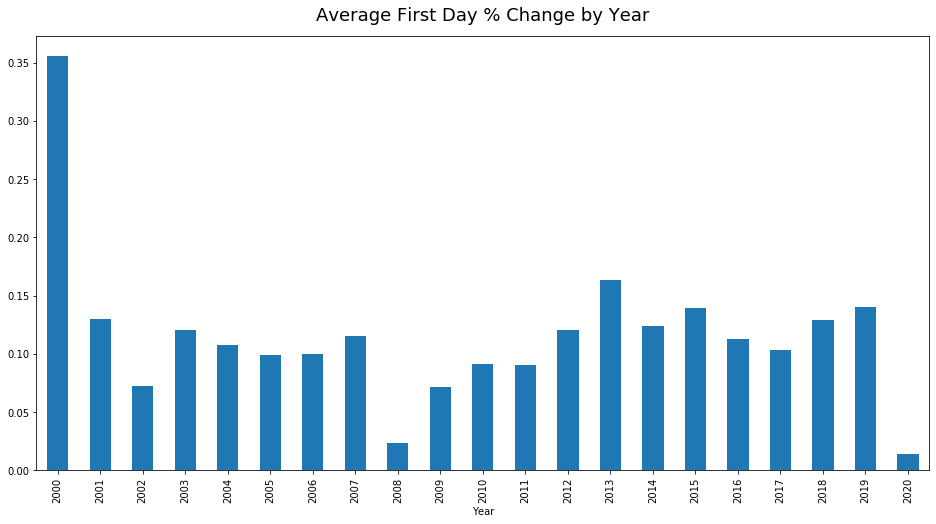

In [25]:
fig, ax = plt.subplots(figsize = (16, 8))
summary_byYear['mean'].plot(kind = 'bar', ax = ax)
ax.set_title('Average First Day % Change by Year', fontdict = {'size': 18}, y = 1.02)

It should be noted that the first day preformance only relates to investors who purchase the shares (offerings) before the IPO day.

The first day return that relates to the general public is received as the difference between the opening price and the closing price.

#### Next add aonther column to the dataframe: to define the price difference for the general public

In [26]:
df_ipo['1st Day Open to Close % Chg'] = (df_ipo['1st Day Close'] - df_ipo['Opening Price']) / df_ipo['Opening Price']

In [27]:
df_ipo['1st Day Open to Close % Chg'].describe()

count    3404.000000
mean        0.013652
std         0.114836
min        -0.492812
25%        -0.028842
50%         0.000000
75%         0.040000
max         2.173653
Name: 1st Day Open to Close % Chg, dtype: float64

Taking a look at the average return value at 0.013 (or 1.3%), it shows that it is less lucrative in terms of returns.

Text(0.5, 1.02, 'Average 1st Day Open to Close % Change by Year')

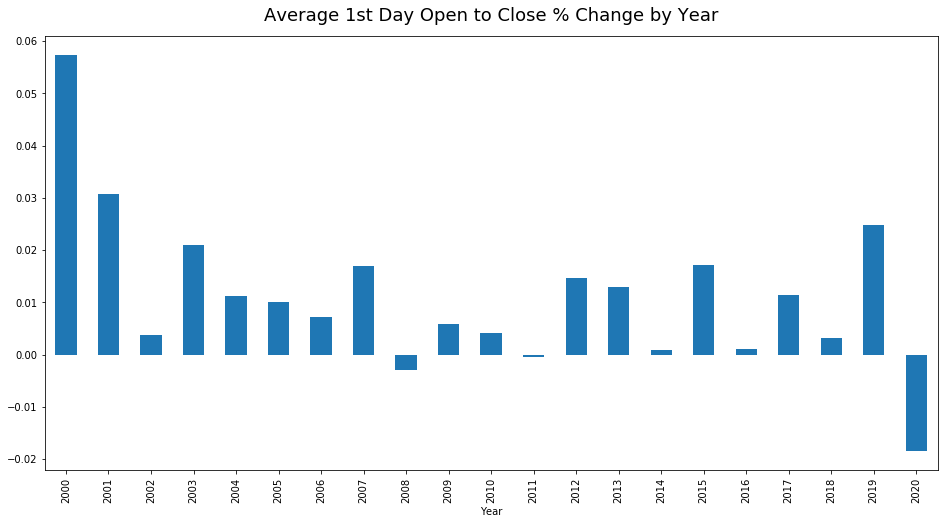

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
df_ipo.groupby('Year')['1st Day Open to Close % Chg'].mean().plot(kind = 'bar', ax = ax)
ax.set_title('Average 1st Day Open to Close % Change by Year', fontdict = {'size': 18}, y = 1.02)

It can be seen from the plot above that the annual average returns for the general public, whom have traded on the first day will have lower returns. This can be seen when compared with the previous plot.